#  <span style="color:#712B75">Advance Regression - Housing Price Prediction</span>

### Problem Statement:
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below. 

##### The company wants to know:
1) Which variables are significant in predicting the price of a house, and
How well those variables describe the price of a house. 
.

2) Determine the optimal value of lambda for ridge and lasso regression.
##### Goal:
 You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.



## <span style="color:#712B75">Importing Libraries<span>

In [341]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# model building packages
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

## <span style="color:#712B75"> Reading Dataset and Understanding Data<span>

In [342]:
house_price_data = pd.read_csv('train.csv')
house_price_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [343]:
house_price_data.shape

(1460, 81)

#### To check dataframe for null and datatype 

In [344]:
house_price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [345]:
house_price_data.describe([0.25,0.50,0.75,0.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
99%,1445.410000,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000,360.000000,3123.480000,2.000000,1.000000,3.000000,1.000000,5.000000,2.000000,11.000000,2.000000,2009.000000,3.000000,1002.790000,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,201

In [346]:
round(house_price_data.isnull().sum()/len(house_price_data.index),2).sort_values(ascending=False).head(18)

PoolQC          1.00
MiscFeature     0.96
Alley           0.94
Fence           0.81
FireplaceQu     0.47
LotFrontage     0.18
GarageYrBlt     0.06
GarageFinish    0.06
GarageType      0.06
GarageQual      0.06
GarageCond      0.06
BsmtExposure    0.03
BsmtQual        0.03
BsmtCond        0.03
BsmtFinType2    0.03
BsmtFinType1    0.03
MasVnrType      0.01
MasVnrArea      0.01
dtype: float64

### Observation : 
##### Column with highest null value shown at the top.

#### Considering 10% as my threshold and dropping the column having more then the threshold

In [347]:
round(house_price_data.isnull().sum()/len(house_price_data.index),2)[round(house_price_data.isnull().sum()/
                                                                 len(house_price_data.index),2).values>0.10]

LotFrontage    0.18
Alley          0.94
FireplaceQu    0.47
PoolQC         1.00
Fence          0.81
MiscFeature    0.96
dtype: float64

#### ------------------------------------------------------------------------------------------------------------------------------------------------------

###   removing column With more null than threshold 

In [348]:
house_price_data = house_price_data.drop(['LotFrontage','Alley','FireplaceQu','PoolQC','Fence','MiscFeature','MoSold'],axis='columns')

#### Checking the columns where the missing values between 0-10%

In [349]:
round(house_price_data.isnull().sum()/len(house_price_data.index),2)[round(house_price_data.isnull().sum()/
                                                                 len(house_price_data.index),2).values>0.00]

MasVnrType      0.01
MasVnrArea      0.01
BsmtQual        0.03
BsmtCond        0.03
BsmtExposure    0.03
BsmtFinType1    0.03
BsmtFinType2    0.03
GarageType      0.06
GarageYrBlt     0.06
GarageFinish    0.06
GarageQual      0.06
GarageCond      0.06
dtype: float64

#### will Clean some more data  will   convert the Year columns with the age we will fill these columns with number , And if we query the max year for all these columns these will come out to be 2010 ,EX. suppose the YearBuilt=2000 , Then YearBuiltOld = 2010-2000 =10

In [350]:
house_price_data['YearBuilt_Old'] = house_price_data.YearBuilt.max()-house_price_data.YearBuilt
house_price_data['YearRemodAdd_Old'] = house_price_data.YearRemodAdd.max()-house_price_data.YearRemodAdd
house_price_data['GarageYrBlt_Old'] = house_price_data.GarageYrBlt.max()-house_price_data.GarageYrBlt
house_price_data['YrSold_Old'] = house_price_data.YrSold.max()-house_price_data.YrSold
house_price_data[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','YearBuilt_Old','YearRemodAdd_Old',
             'GarageYrBlt_Old','YrSold_Old']].sample(10)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
1125,1955,1955,1977.0,2009,55,55,33.0,1
153,1960,1975,1960.0,2008,50,35,50.0,2
494,1938,1996,1938.0,2009,72,14,72.0,1
697,1952,1952,1952.0,2006,58,58,58.0,4
945,1890,1996,1963.0,2009,120,14,47.0,1
750,1910,2004,NaN,2010,100,6,NaN,0
790,2005,2006,2005.0,2009,5,4,5.0,1
1158,2007,2008,2008.0,2008,3,2,2.0,2
120,1969,1969,1969.0,2006,41,41,41.0,4
131,2000,2000,2000.0,2009,10,10,10.0,1


####   droping the actual Year columns


In [351]:
house_price_data = house_price_data.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis='columns') 

Filling Missing Data

In [352]:
house_price_data.MasVnrType.fillna('none',inplace=True)
house_price_data.MasVnrArea.fillna(house_price_data.MasVnrArea.mean(),inplace=True)
house_price_data.BsmtQual.fillna('TA',inplace=True)
house_price_data.BsmtCond.fillna('TA',inplace=True)
house_price_data.BsmtExposure.fillna('No',inplace=True)
house_price_data.BsmtFinType1.fillna('Unf',inplace=True)
house_price_data.BsmtFinType2.fillna('Unf',inplace=True)
house_price_data.GarageType.fillna('Attchd',inplace=True)
house_price_data.GarageYrBlt_Old.fillna(-1,inplace=True)
house_price_data.GarageFinish.fillna('Unf',inplace=True)
house_price_data.GarageQual.fillna('TA',inplace=True)
house_price_data.GarageCond.fillna('TA',inplace=True)

####   'Street' & 'Utilities' is   e lowest valrience hence dropping these columns and there is no use of id too

In [353]:
house_price_data.Street.value_counts()
house_price_data.Utilities.value_counts()


AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [354]:
house_price_data = house_price_data.drop(['Street','Utilities','Id'],axis='columns')

In [355]:
house_price_data[list(house_price_data.dtypes[house_price_data.dtypes!='object'].index)].describe()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890,38.732192,25.134247,29.691096,2.184247
std,42.300571,9981.264932,1.382997,1.112799,180.569112,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883,30.202904,20.645407,25.121824,1.328095
min,20.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,0.000000,-1.000000,0.000000
25%,20.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000,10.000000,6.000000,7.000000,1.000000
50%,50.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000,37.000000,16.000000,25.500000,2.000000
75%,70.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000,56.000000,43.000000,48.000000,3.000000
max,190.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000,138.000000,60.000000,110.000000,4.000000


#### Checking Correlation with heat map

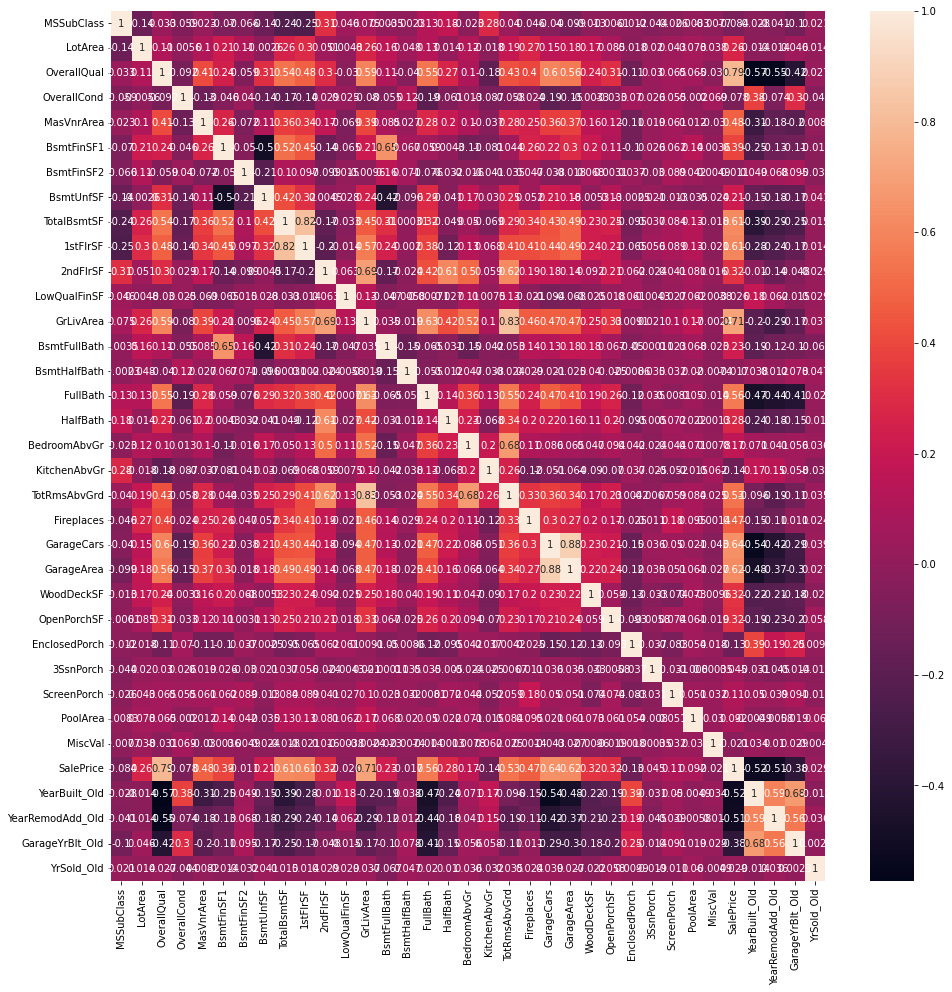

In [356]:
plt.figure(figsize=(16,16))
sns.heatmap(house_price_data[list(house_price_data.dtypes[house_price_data.dtypes!='object'].index)].corr(),annot=True)
plt.show()

Ploting Scatter According to high correlation

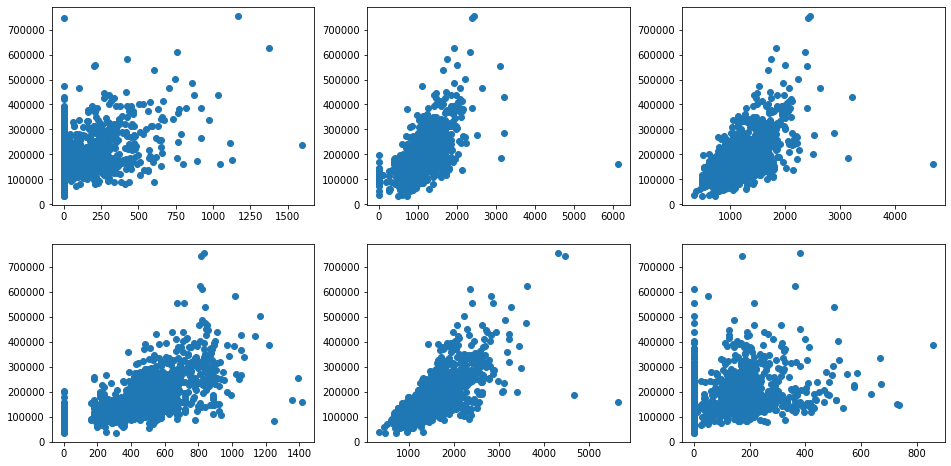

In [357]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.scatter(house_price_data['MasVnrArea'],house_price_data.SalePrice)
plt.subplot(2,3,2)
plt.scatter(house_price_data['TotalBsmtSF'],house_price_data.SalePrice)
plt.subplot(2,3,3)
plt.scatter(house_price_data['1stFlrSF'],house_price_data.SalePrice)
plt.subplot(2,3,4)
plt.scatter(house_price_data['GarageArea'],house_price_data.SalePrice)
plt.subplot(2,3,5)
plt.scatter(house_price_data['GrLivArea'],house_price_data.SalePrice)
plt.subplot(2,3,6)
plt.scatter(house_price_data['WoodDeckSF'],house_price_data.SalePrice)

In [358]:
num_col = list(house_price_data.dtypes[house_price_data.dtypes !='object'].index)
num_col = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','GrLivArea','OpenPorchSF',
           'EnclosedPorch','3SsnPorch',
           'ScreenPorch' ,'PoolArea','MiscVal','SalePrice']
def drop_outliers(x):
    list = []
    for col in num_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

house_price_data = drop_outliers(house_price_data)

In [359]:
house_price_data.shape

(1441, 71)

In [360]:
house_price_data[list(house_price_data.dtypes[house_price_data.dtypes=='object'].index)].head()

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


####  bellow  we can clearly see that these are having some kind of order and hence we can say these are ordinal in nature

In [361]:
house_price_data[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,Gtl,Gd,Gd,TA,No,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,Reg
1,Gtl,TA,Gd,TA,Gd,ALQ,Unf,Ex,Y,TA,RFn,TA,TA,TA,Reg
2,Gtl,Gd,Gd,TA,Mn,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1
3,Gtl,TA,TA,Gd,No,ALQ,Unf,Gd,Y,Gd,Unf,TA,TA,TA,IR1
4,Gtl,Gd,Gd,TA,Av,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1


Mapping Data with more meaning full chaging to 0,1,2,3,4,5 

In [362]:
house_price_data['LandSlope'] = house_price_data.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
house_price_data['ExterQual'] = house_price_data.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_price_data['BsmtQual'] = house_price_data.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_price_data['BsmtCond'] = house_price_data.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_price_data['BsmtExposure'] = house_price_data.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
house_price_data['BsmtFinType1'] = house_price_data.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
house_price_data['BsmtFinType2'] = house_price_data.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
house_price_data['HeatingQC'] = house_price_data.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_price_data['CentralAir'] = house_price_data.CentralAir.map({'N':0,'Y':1})
house_price_data['KitchenQual'] = house_price_data.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_price_data['GarageFinish'] = house_price_data.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
house_price_data['GarageQual'] = house_price_data.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_price_data['GarageCond'] = house_price_data.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_price_data['ExterCond'] = house_price_data.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_price_data['LotShape'] = house_price_data.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

In [363]:
house_price_data[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,3,4,3,1,6,1,4,1,3,2,3,3,2,3
1,0,2,4,3,4,5,1,4,1,2,2,3,3,2,3
2,0,3,4,3,2,6,1,4,1,3,2,3,3,2,0
3,0,2,3,4,1,5,1,3,1,3,1,3,3,2,0
4,0,3,4,3,3,6,1,4,1,3,2,3,3,2,0


####   joining dummy column with the actual dataset

In [364]:
dummy_col = pd.get_dummies(house_price_data[['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition']],
                           drop_first=True)

house_price_data = pd.concat([house_price_data,dummy_col],axis='columns')

house_price_data = house_price_data.drop(['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition'],axis='columns')

####   distribution of our target variable before scaling and Splitting

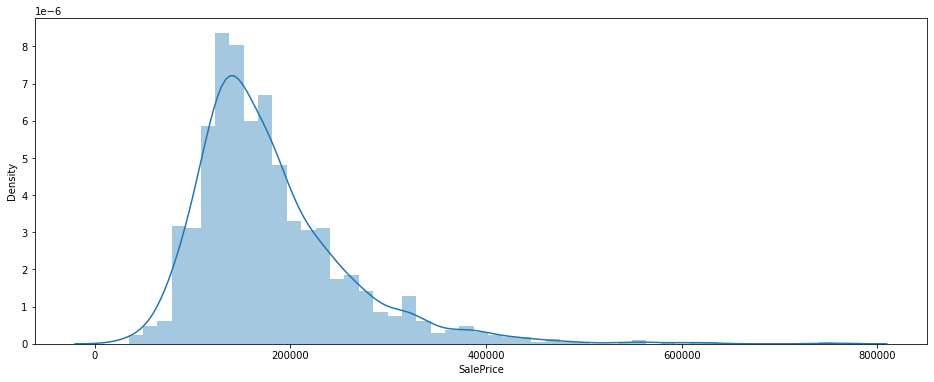

In [365]:
plt.figure(figsize=(16,6))
sns.distplot(house_price_data.SalePrice)
plt.show()

#### Making train and test dataset for validation purpose

In [366]:
df_train,df_test = train_test_split(house_price_data,train_size=0.7,test_size=0.3,random_state=42)
house_price_data[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,3,4,3,1,6,1,4,1,3,2,3,3,2,3
1,0,2,4,3,4,5,1,4,1,2,2,3,3,2,3
2,0,3,4,3,2,6,1,4,1,3,2,3,3,2,0
3,0,2,3,4,1,5,1,3,1,3,1,3,3,2,0
4,0,3,4,3,3,6,1,4,1,3,2,3,3,2,0


#### Scaling the train dataset
#### Note as scale of our dependent valriable SalePrice is very different with the independent variable i am scaling the dependent variable 

In [367]:
num_col = ['MSSubClass','LotArea','OverallQual','OverallCond',
           'MasVnrArea','BsmtFinSF1',
           'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
           'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
           'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',
           'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
           'ScreenPorch','PoolArea','MiscVal','SalePrice']

scaler = StandardScaler()
df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_test[num_col] = scaler.transform(df_test[num_col])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

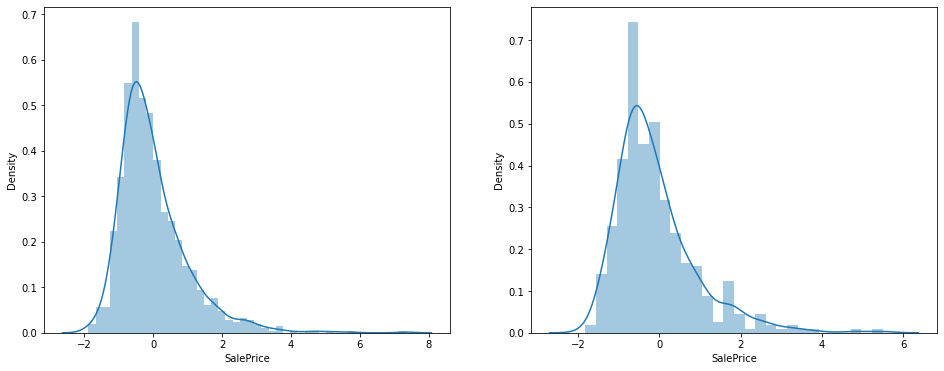

In [368]:
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(df_train.SalePrice)
plt.subplot(122)
sns.distplot(df_test.SalePrice)

#### Spliting the dependent and independent variable

In [369]:
y_train = df_train.pop('SalePrice')
X_train = df_train


In [370]:
y_test = df_test.pop('SalePrice')
X_test = df_test

using  RFE  lets try to to find the optimal number of feature
#### Note :   cannot use RFE with GridSearchCV as due to lot of varible using rfe directly

In [371]:
len(X_train.columns)

193

In [372]:
lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,n_features_to_select=70)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=70)

In [373]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']

In [374]:
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)

####   train and test set for the RFE selected columns

In [375]:
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

## Using Lasso regression model

In [376]:
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8910679288497761
0.850472241103335


In [377]:
model_parameter = list(lm.coef_)
model_parameter.insert(0,lm.intercept_)
model_parameter = [round(x,3) for x in model_parameter]
col = df_train.columns
col.insert(0,'Constant')
list(zip(col,model_parameter))

[('MSSubClass', -0.988),
 ('LotArea', 0.234),
 ('LotShape', 0.132),
 ('LandSlope', 0.166),
 ('OverallQual', 0.162),
 ('OverallCond', 0.041),
 ('MasVnrArea', -0.0),
 ('ExterQual', 0.078),
 ('ExterCond', 0.0),
 ('BsmtQual', 0.0),
 ('BsmtCond', -0.021),
 ('BsmtExposure', 0.325),
 ('BsmtFinType1', 0.156),
 ('BsmtFinSF1', 0.045),
 ('BsmtFinType2', 0.136),
 ('BsmtFinSF2', -0.0),
 ('BsmtUnfSF', 0.197),
 ('TotalBsmtSF', -0.04),
 ('HeatingQC', -0.02),
 ('CentralAir', -0.09),
 ('1stFlrSF', -0.239),
 ('2ndFlrSF', -0.057),
 ('LowQualFinSF', -0.112),
 ('GrLivArea', -0.171),
 ('BsmtFullBath', -0.242),
 ('BsmtHalfBath', -0.199),
 ('FullBath', 0.359),
 ('HalfBath', -0.214),
 ('BedroomAbvGr', -0.191),
 ('KitchenAbvGr', -0.144),
 ('KitchenQual', -0.142),
 ('TotRmsAbvGrd', 0.003),
 ('Fireplaces', 0.133),
 ('GarageFinish', -0.0),
 ('GarageCars', -0.0),
 ('GarageArea', -0.129),
 ('GarageQual', -2.253),
 ('GarageCond', -0.349),
 ('WoodDeckSF', -0.248),
 ('OpenPorchSF', -0.145),
 ('EnclosedPorch', 0.0),
 ('3

####     improving our model with the optimal value of alpha using GridSearchCV

In [378]:
folds = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [379]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.033211,0.022514,0.001795,0.000598,0.0001,{'alpha': 0.0001},0.839556,0.900501,0.781559,0.873274,0.896397,0.891271,0.896118,0.534049,0.882853,0.917965,0.841354,0.108924,1,0.901925,0.897804,0.906855,0.901077,0.898584,0.899022,0.897429,0.912191,0.899654,0.896546,0.901109,0.004633
1,0.021241,0.001670,0.002392,0.000799,0.0010,{'alpha': 0.001},0.840195,0.895143,0.813999,0.867746,0.899124,0.886210,0.902603,0.432978,0.889349,0.923813,0.835116,0.137450,2,0.894381,0.889636,0.897801,0.892582,0.889965,0.890633,0.888488,0.903992,0.891505,0.888249,0.892723,0.004653
2,0.004593,0.001101,0.001303,0.000447,0.0100,{'alpha': 0.01},0.812446,0.855282,0.830838,0.823808,0.865391,0.852868,0.878262,0.372504,0.863370,0.920814,0.807558,0.147891,3,0.840362,0.838088,0.839245,0.838821,0.836079,0.836514,0.833666,0.870742,0.838456,0.832728,0.840470,0.010351
3,0.004490,0.000911,0.001801,0.000595,0.0500,{'alpha': 0.05},0.786077,0.833859,0.810067,0.777508,0.833777,0.828312,0.854591,0.433131,0.847758,0.899526,0.790461,0.123588,4,0.814408,0.810529,0.809629,0.815270,0.810887,0.811644,0.806230,0.844542,0.811775,0.806372,0.814129,0.010509
4,0.003485,0.000501,0.001401,0.000493,0.1000,{'alpha': 0.1},0.741693,0.805251,0.769777,0.741077,0.796823,0.795208,0.820518,0.482934,0.825310,0.874104,0.765269,0.101424,5,0.788170,0.781957,0.780282,0.789278,0.783349,0.783012,0.776474,0.817421,0.783703,0.778584,0.786223,0.011038


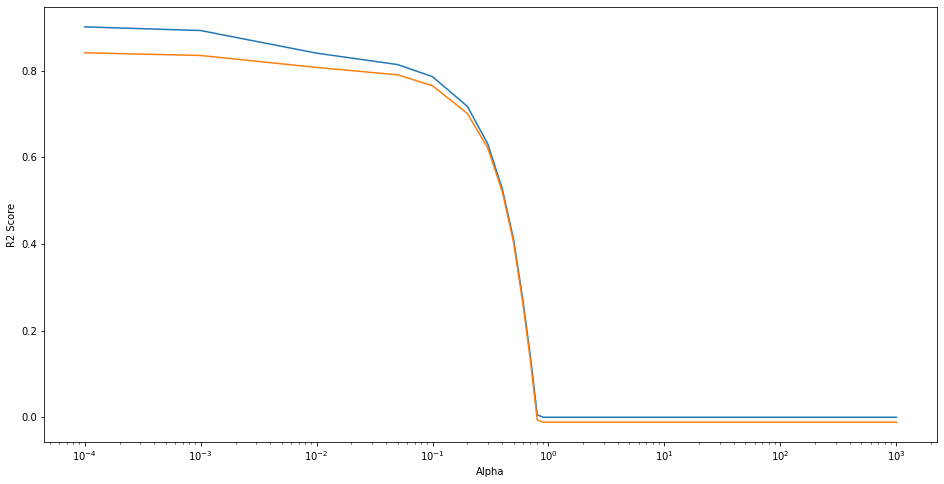

In [380]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [381]:
model_cv.best_params_

{'alpha': 0.0001}

In [382]:
lasso = Lasso(alpha=0.0002)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8985489047566092
0.8443490308882812


In [383]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [384]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
43,PoolArea,1.750745
67,Neighborhood_Gilbert,0.632166
68,Neighborhood_IDOTRR,0.405947
26,FullBath,0.315832
41,3SsnPorch,0.267934
9,BsmtQual,0.219450
1,LotArea,0.213728
16,BsmtUnfSF,0.208574
65,Neighborhood_Crawfor,0.203769
53,LandContour_HLS,0.191694


## Now lets use the ridge regression

In [385]:
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.8994686582558958
0.8381912742639585


#### there are sign of overfitting as alpha is not optimal the clear difference we can see in the train and test score

#### try our model with the optimal value of alpha using GridSearchCV

In [386]:
folds  = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [387]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.003489,0.000803,0.001806,0.000392,0.0001,{'alpha': 0.0001},0.839289,0.901572,0.775331,0.873935,0.892985,0.891511,0.892623,0.544229,0.880973,0.917182,0.840963,0.106048,16,0.902149,0.898072,0.907160,0.901339,0.898884,0.899287,0.897734,0.912410,0.899906,0.896812,0.901375,0.004621
1,0.003190,0.000608,0.001707,0.000452,0.0010,{'alpha': 0.001},0.839329,0.901565,0.775629,0.873931,0.892995,0.891512,0.892643,0.544144,0.881000,0.917190,0.840994,0.106056,15,0.902149,0.898072,0.907160,0.901339,0.898884,0.899286,0.897734,0.912410,0.899906,0.896812,0.901375,0.004621
2,0.003383,0.000490,0.001212,0.000395,0.0100,{'alpha': 0.01},0.839718,0.901492,0.778552,0.873884,0.893094,0.891524,0.892839,0.543297,0.881267,0.917266,0.841293,0.106141,14,0.902147,0.898070,0.907156,0.901338,0.898883,0.899285,0.897733,0.912409,0.899904,0.896811,0.901374,0.004621
3,0.003572,0.000485,0.001314,0.000451,0.0500,{'alpha': 0.05},0.841164,0.901167,0.790385,0.873680,0.893508,0.891559,0.893628,0.539670,0.882370,0.917587,0.842472,0.106625,12,0.902118,0.898046,0.907066,0.901315,0.898859,0.899261,0.897705,0.912395,0.899878,0.896785,0.901343,0.004616
4,0.003079,0.000304,0.001112,0.000299,0.1000,{'alpha': 0.1},0.842476,0.900761,0.802891,0.873437,0.893973,0.891582,0.894464,0.535428,0.883592,0.917950,0.843655,0.107397,11,0.902037,0.897978,0.906823,0.901249,0.898790,0.899191,0.897629,0.912357,0.899803,0.896714,0.901257,0.004602


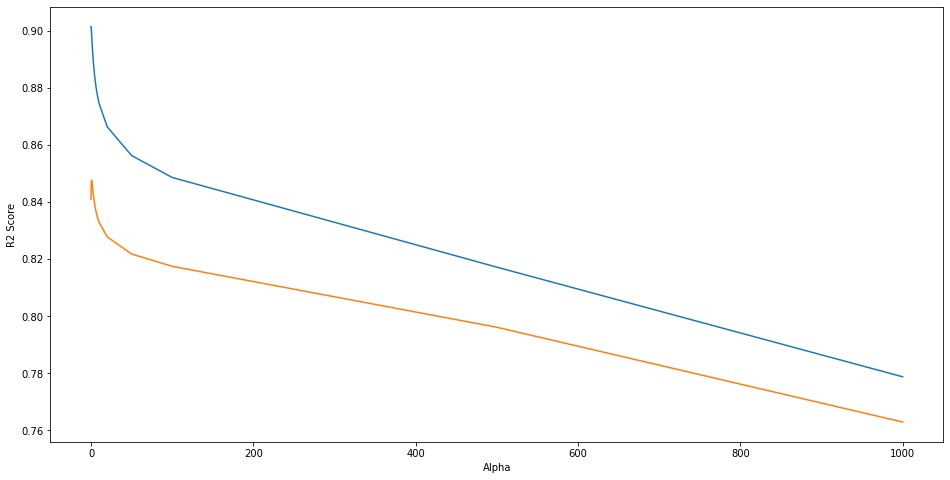

In [388]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')
# plt.xscale('log')
plt.ylabel('R2 Score')
plt.show()

#### On the basis of   graph lets create the model

In [389]:
model_cv.best_params_

{'alpha': 0.7}

In [390]:
ridge = Ridge(alpha = 1.4)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.8942543110425039
0.8525780274386424


In [391]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [392]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
43,PoolArea,1.316088
67,Neighborhood_Gilbert,0.440710
26,FullBath,0.318515
68,Neighborhood_IDOTRR,0.244097
53,LandContour_HLS,0.218743
1,LotArea,0.218403
16,BsmtUnfSF,0.208221
41,3SsnPorch,0.190123
14,BsmtFinType2,0.181083
11,BsmtExposure,0.178149


## Conclusion:
### R2 Score are same in both Ridge and Lasso but as lasso use more on data set and can also help in feature elimation will use it 

In [393]:
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8991923593936173
0.8414807574019303


#### After compairing both the model we can see that the below Features are best explaining the DataSet

In [394]:
#PoolArea      
#Neighborhood_Gilbert 
#Neighborhood_IDOTRR 
#FullBath 
#3SsnPorch 

### Best alpha value for Lasso : {'alpha': 0.0001}
#### Best alpha value for Ridge : {'alpha': 0.7}